# Neural Networks

### Assignment_5- Machine Learning
### Pooja Umathe 

# Task- 1

Run a multilayer perceptron (feed forward neural network) with two hidden layers and rectified linear nonlinearities on the iris dataset using the keras Sequential interface (https://keras.io/getting-started/sequential-model-guide/). Include code for selecting regularization strength and number of hidden units using GridSearchCV and evaluation on an independent test-set.

In [0]:
# Importing Libraries

import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline

C:\Users\Rahul\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from sklearn.cross_validation import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.grid_search import GridSearchCV
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Iris Dataset: 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica



In [0]:
# Importing the iris dataset

from sklearn.datasets import load_iris
data = load_iris()


In [0]:
type(data)

sklearn.utils.Bunch

In [0]:
# print the iris dataset
# Each row represents the flowers and each column represents the length and width.
print (data)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [0]:
# print the names of the features
print (data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
# print the integers representing the species of each observation
print (data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
# Splitting the data

from sklearn.model_selection import train_test_split

np.random.RandomState(seed=0)
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], random_state=0)


 Multilayer perceptron (feed forward neural network):Multi-layer perceptron is a type of network where multiple layers of a group of perceptron are stacked together to make a model. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (any) and to the output nodes. There are no cycles or loops in the network. Here, we are considering two hidden layers.

In [0]:
# Defining the callable which will complile the model

def make_model(optimizer='adam', hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_dim = 4),
        Activation('relu'),
        Dense(hidden_size),
        Activation('relu'),
        Dense(3),
        Activation('softmax')
    ])
        
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model



In [0]:
# Using grid search by taking epochs- 1,3,5 and hidden size- 10,32,64

clf = KerasClassifier(make_model)

param_grid = {'epochs' : [1, 3, 5],
              'hidden_size':  [10, 32, 64]}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)



Epoch 1/1
89/89 [==============================] - 0s 45us/step
Epoch 1/1
89/89 [==============================] - 0s 45us/step
Epoch 1/1
90/90 [==============================] - 0s 44us/step
Epoch 1/1
90/90 [==============================] - 0s 44us/step
Epoch 1/1
90/90 [==============================] - 0s 44us/step
Epoch 1/1
89/89 [==============================] - 0s 34us/step
Epoch 1/1
89/89 [==============================] - 0s 45us/step
Epoch 1/1
90/90 [==============================] - 0s 44us/step
Epoch 1/1
90/90 [==============================] - 0s 33us/step
Epoch 1/1
90/90 [==============================] - 0s 44us/step
Epoch 1/1
89/89 [==============================] - 0s 79us/step
Epoch 1/1
89/89 [==============================] - 0s 67us/step
Epoch 1/1
90/90 [==============================] - 0s 56us/step
Epoch 1/1
90/90 [==============================] - 0s 67us/step
Epoch 1/1
90/90 [==============================] - 0s 44us/step
Epoch 1/3
89/89 [=======================

90/90 [==============================] - 2s 18ms/step - loss: 1.6710 - acc: 0.3889
Epoch 2/5
90/90 [==============================] - 0s 100us/step - loss: 1.3239 - acc: 0.3889
Epoch 3/5
90/90 [==============================] - 0s 89us/step - loss: 1.1026 - acc: 0.4111
Epoch 4/5
90/90 [==============================] - 0s 111us/step - loss: 0.9735 - acc: 0.6889
Epoch 5/5
90/90 [==============================] - 0s 78us/step
Epoch 1/5
90/90 [==============================] - 2s 18ms/step - loss: 1.3680 - acc: 0.3444
Epoch 2/5
90/90 [==============================] - 0s 133us/step - loss: 1.1355 - acc: 0.3444
Epoch 3/5
90/90 [==============================] - 0s 122us/step - loss: 0.9816 - acc: 0.7333
Epoch 4/5
90/90 [==============================] - 0s 111us/step - loss: 0.9114 - acc: 0.7111
Epoch 5/5
90/90 [==============================] - 0s 78us/step
Epoch 1/5
112/112 [==============================] - 2s 14ms/step - loss: 1.9495 - acc: 0.3304
Epoch 2/5
112/112 [===================

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000004BFE495198>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 3, 5], 'hidden_size': [10, 32, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Printing the best parameter from gridsearch

print(grid.best_params_)

{'epochs': 5, 'hidden_size': 64}


Now, we got our best grid parameters. 

In [0]:
num_cls = 3
y_train = keras.utils.to_categorical(y_train, num_cls)
y_test = keras.utils.to_categorical(y_test, num_cls)


In [0]:
model = make_model()

model.fit(X_train, y_train,
          epochs = 100,
          batch_size = 3,
          validation_split = 0.1)


Train on 100 samples, validate on 12 samples
Epoch 1/100
100/100 [==============================] - 2s 20ms/step - loss: 1.3645 - acc: 0.4000 - val_loss: 1.0508 - val_acc: 0.7500
Epoch 2/100
100/100 [==============================] - 0s 841us/step - loss: 1.0355 - acc: 0.5300 - val_loss: 1.0131 - val_acc: 0.5833
Epoch 3/100
100/100 [==============================] - 0s 831us/step - loss: 0.9198 - acc: 0.7100 - val_loss: 0.8929 - val_acc: 0.5833
Epoch 4/100
100/100 [==============================] - 0s 901us/step - loss: 0.7963 - acc: 0.7100 - val_loss: 0.7498 - val_acc: 0.5833
Epoch 5/100
100/100 [==============================] - 0s 861us/step - loss: 0.6671 - acc: 0.8200 - val_loss: 0.6358 - val_acc: 0.5833
Epoch 6/100
100/100 [==============================] - 0s 851us/step - loss: 0.5730 - acc: 0.7100 - val_loss: 0.5509 - val_acc: 0.5833
Epoch 7/100
100/100 [==============================] - 0s 841us/step - loss: 0.4903 - acc: 0.7400 - val_loss: 0.4882 - val_acc: 0.5833
Epoch 8/100

In [0]:
# Printing the summary of the model

print('\nSummary:')
model.summary()



Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 32)                160       
_________________________________________________________________
activation_139 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 32)                1056      
_________________________________________________________________
activation_140 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_141 (Dense)            (None, 3)                 99        
_________________________________________________________________
activation_141 (Activation)  (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
________________________________________________________________

In [0]:
plt.rcParams["figure.dpi"] = 120
np.set_printoptions(precision=3, suppress=True)

In [0]:
# Evaluating the test set

score = model.evaluate(X_test, y_test, batch_size=3, verbose=0)
score

[0.16070917079770497, 0.9473684226211748]

In [0]:
# Printing test loss from the score

print("\nTest loss: {:.3f}".format(score[0]))


Test loss: 0.161


In [0]:
# Printing the test accuracy 

print("Test Accuracy: {:.3f}".format(score[1]))

Test Accuracy: 0.947


So we got 94.7 accuracy of the model which is pretty much good.

In [0]:
# Evaluating the validation by fitting the model(Loogers and callback)

history_callback = model.fit(X_train, y_train, batch_size=64,
                             epochs=100, verbose=1, validation_split=.1)


Train on 100 samples, validate on 12 samples
Epoch 1/100
100/100 [==============================] - 0s 110us/step - loss: 0.0224 - acc: 1.0000 - val_loss: 0.1801 - val_acc: 0.9167
Epoch 2/100
100/100 [==============================] - 0s 90us/step - loss: 0.0225 - acc: 1.0000 - val_loss: 0.1771 - val_acc: 0.9167
Epoch 3/100
100/100 [==============================] - 0s 110us/step - loss: 0.0228 - acc: 1.0000 - val_loss: 0.1750 - val_acc: 0.9167
Epoch 4/100
100/100 [==============================] - 0s 100us/step - loss: 0.0228 - acc: 1.0000 - val_loss: 0.1753 - val_acc: 0.9167
Epoch 5/100
100/100 [==============================] - 0s 100us/step - loss: 0.0227 - acc: 1.0000 - val_loss: 0.1778 - val_acc: 0.9167
Epoch 6/100
100/100 [==============================] - 0s 100us/step - loss: 0.0227 - acc: 1.0000 - val_loss: 0.1815 - val_acc: 0.9167
Epoch 7/100
100/100 [==============================] - 0s 100us/step - loss: 0.0224 - acc: 1.0000 - val_loss: 0.1845 - val_acc: 0.9167
Epoch 8/100

In [0]:
# Defining the parameters and values to plot the history_callback

def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

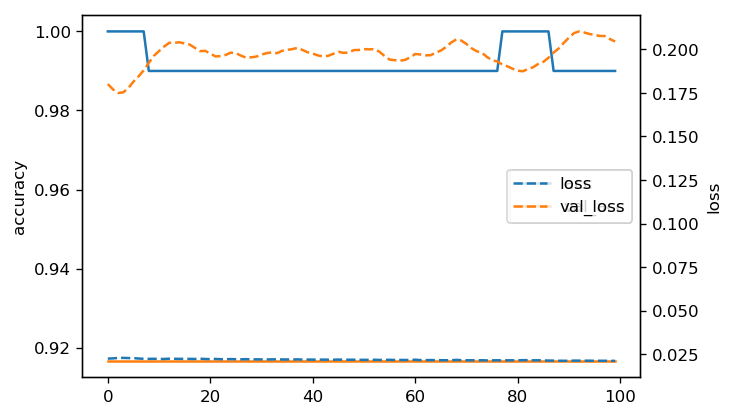

In [0]:
# Plotting the accuracy and loss

plot_history(history_callback)
plt.show()

 As we can see that we got pretty much good accuracy 94.7 and the loss value is less which is 0.161 means it's good for our model and we can observe from the graph loss and val_loss which is great we achieved what we expected.